In [7]:
from math import exp
from scipy import stats
from numpy import *
import matplotlib.pyplot as plt

## Hart: Cumulative Density Function

In [47]:
def caculateStandardNormalCDF(x):
    
    t = abs(x)
    t1 = 7.07106781186547
    t2 = 37
    t3 = 2.506628274631
    
    a1 = 0.0352624965998911
    a2 = 0.700383064443688
    a3 = 6.37396220353165
    a4 = 33.912866078383
    a5 = 112.079291497871
    a6 = 221.213596169931
    a7 = 220.206867912376
    b1 = 0.0883883476483184
    b2 = 1.75566716318264
    b3 = 16.064177579207
    b4 = 86.7807322029461
    b5 = 296.564248779674
    b6 = 637.333633378831
    b7 = 793.826512519948
    b8 = 440.413735824752
    
    A = ((((((a1*t+a2)*t+a3)*t+a4)*t+a5)*t+a6)*t+a7)
    B = (((((((b1*t+b2)*t+b3)*t + b4)*t + b5)*t + b6)*t + b7)*t + b8)
    C = (t+1)/(t + 2/(t + 3/(t + 4/(t + 0.65))))
    
    if t<t1:
        N = exp(-1*(t**2/2))*(A/B)
    elif t1<=t<=t2:
        N = exp(-1*t**2/2)*1/(t3*C)
    else:
        N = 0
    
    if x<0:
        return N
    else:
        return 1-N

## Test

In [51]:
def main():
    x1 = -0.02
    x2 = -0.8
    x3 = 0.182
    x =  [x1,x2,x3]
    for i in range(len(x)):
        if caculateStandardNormalCDF(x[i])==stats.norm.cdf(x[i]):
            print("Well done!")

In [52]:
main()

Well done!
Well done!
Well done!


## Multithreading

In [54]:
import threading
import time

def addHarmonicSeries(n):
    sum=0.0
    for i in range(1,n):
        sum=sum + 1.0/i
        print('{:5d} {:12.6f}'.format(i, sum))
    start_time = time.clock()
    no_thread = 100
    for i in range(no_thread):
        t = threading.Thread(target=addHarmonicSeries, args=(i,))
        t.start()
        print("\n-->"+t.getName() + "\n")
        time.sleep(1)


    print ("\n The main stread stops after {}".format(time.clock()-start_time)+" seconds")

## Monte Carlo Simulation with BSM model

In [34]:
def mc_pricing(S, K, T, r, sigma, option_type, no_trial):
    random.seed(10000)
    z = random.standard_normal(no_trial)
    ## stock price at Time T
    ST = S * exp( (r - 0.5 * sigma**2) * T+ sigma * sqrt(T) * z)
    if option_type == 'call':
        payoff = maximum(ST - K,0)
        eu_call_price = exp(-r*T)*sum(payoff)/no_trial
        return eu_call_price
    else:
        payoff = maximum(K - ST,0)
        eu_put_price = exp(-r*T)*sum(payoff)/no_trial
        return eu_put_price

**An European call with continuous dividend yield:**

In [35]:
no_trial = 10**7
S = 50
K = 80,
r = 0.1
T = 5/12
sigma = 0.35
option_type = 'call'
mc_pricing(S, K, T, r, sigma, option_type, no_trial)

0.15563938348904677

**An European put option on stock indexes with a cost-of-carry:**

In [36]:
S = 80
K = 75
r = 0.1
T = 5/12
sigma = 0.20
option_type = 'put'
mc_pricing(S, K, T, r, sigma, option_type, no_trial)

1.1300063772351197

In [37]:
no_trial = 10**7
no_trial_2 = 10**6
no_trial_3 = 10**8
no_trial_4 =  10**5
no_trial_5 = 10**4
S = 50
K = 80,
r = 0.1
T = 5/12
sigma = 0.35
option_type = 'call'
call_1 = mc_pricing(S, K, T, r, sigma, option_type, no_trial)
call_2 = mc_pricing(S, K, T, r, sigma, option_type, no_trial_2)
call_3 = mc_pricing(S, K, T, r, sigma, option_type, no_trial_3)
call_4 = mc_pricing(S, K, T, r, sigma, option_type, no_trial_4)
call_5 = mc_pricing(S, K, T, r, sigma, option_type, no_trial_5)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  3.]),
 array([ 0.1439722 ,  0.14456041,  0.14514862,  0.14573683,  0.14632503,
         0.14691324,  0.14750145,  0.14808966,  0.14867787,  0.14926608,
         0.14985429,  0.1504425 ,  0.1510307 ,  0.15161891,  0.15220712,
         0.15279533,  0.15338354,  0.15397175,  0.15455996,  0.15514817,
         0.15573637]),
 <a list of 20 Patch objects>)

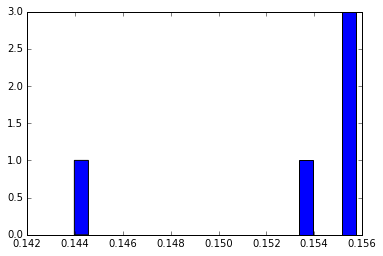

In [42]:
%matplotlib inline
call_list = [call_1,call_2,call_3,call_4,call_5]
plt.hist(call_list,bins = 20)

## Simulation with Threading??

## BS model 